<a href="https://colab.research.google.com/github/dayeong918/pdm011/blob/main/py-pandas/pandas_4_visualizing_df.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Python module 3. **pandas**

# Using pandas

* [10 Minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html)
* [Pandas tutorial with interactive exercises](https://www.kaggle.com/pistak/pandas-tutorial-with-interactive-exercises)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline  # work for Jupyter notebook or lab

In [3]:
# Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:
dates = pd.date_range('20210927', periods=6)
dates

DatetimeIndex(['2021-09-27', '2021-09-28', '2021-09-29', '2021-09-30',
               '2021-10-01', '2021-10-02'],
              dtype='datetime64[ns]', freq='D')

In [5]:
# head()
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2021-09-27,-0.432265,-2.036778,0.352758,0.124802
2021-09-28,0.333802,0.044233,-0.338748,-0.837213
2021-09-29,-0.479120,-1.190366,-1.129306,-0.017706
2021-09-30,-0.339585,0.271231,1.128125,0.085975
2021-10-01,-0.278084,-1.178924,-0.397808,0.371691
2021-10-02,-0.697331,-0.779296,-0.792365,-1.224937




---



# 데이터 시각화

#### [도전] 데이터프레임 df의 평균(mean(0))과 표준편차를 이용한 그래프
- 평균에 대한 꺽은선그래프
- 평균과 표준편차를 이용한 막대그래프
> x-축은 A,B,C,D

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  after removing the cwd from sys.path.


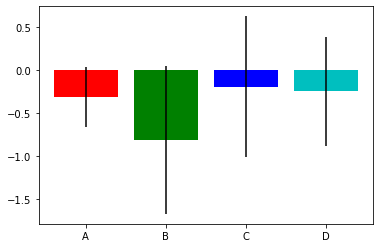

In [6]:
# df의 평균(mean(0))과 표준편차를 이용한 바그래프
bar_labels = df.columns
# plot bars
plt.bar(bar_labels, df.mean(0), yerr=df.std(0), color='rgbcy')
plt.show()

***

## pandas의 데이터 시각화 (Visualization)

In [7]:
df

,A,B,C,D
2021-09-27,-0.432265,-2.036778,0.352758,0.124802
2021-09-28,0.333802,0.044233,-0.338748,-0.837213
2021-09-29,-0.479120,-1.190366,-1.129306,-0.017706
2021-09-30,-0.339585,0.271231,1.128125,0.085975
2021-10-01,-0.278084,-1.178924,-0.397808,0.371691
2021-10-02,-0.697331,-0.779296,-0.792365,-1.224937


### 꺽은선 그래프

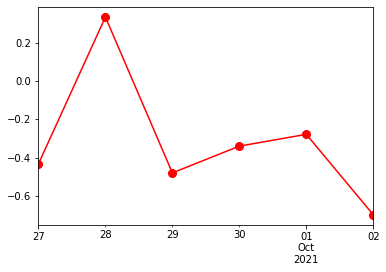

In [8]:
df['A'].plot(marker='o', c='r', ms=8)

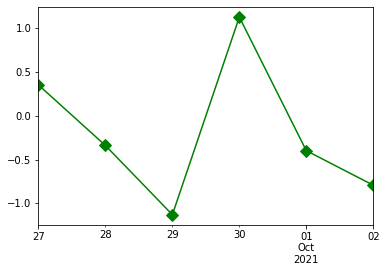

In [9]:
df['C'].plot(marker='D', c='g', ms=8)  # set figsize

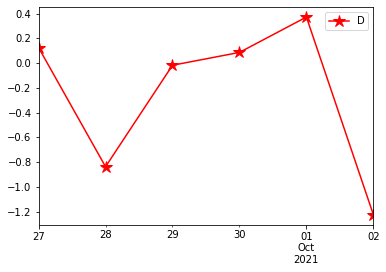

In [10]:
df.plot(y='D', marker='*', c='r', ms=12)   # x-축은 날짜인덱스

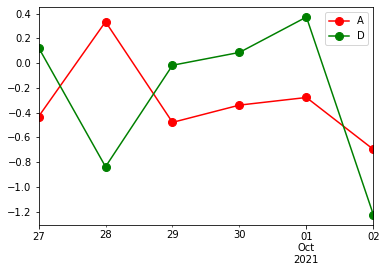

In [11]:
# 두 개의 그래프를 한 축에 그리기
# df['A','D'].plot(marker='o', c='r', ms=8)
df[['A','D']].plot(marker='o', color='rg', ms=8)  # works!, change colors # color: 두 가지 색깔 설정 가능.

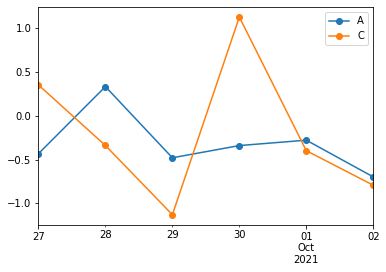

In [12]:
df.plot(y=['A','C'], marker='o') 

### 산포도 (Scatter graph)

In [13]:
df

,A,B,C,D
2021-09-27,-0.432265,-2.036778,0.352758,0.124802
2021-09-28,0.333802,0.044233,-0.338748,-0.837213
2021-09-29,-0.479120,-1.190366,-1.129306,-0.017706
2021-09-30,-0.339585,0.271231,1.128125,0.085975
2021-10-01,-0.278084,-1.178924,-0.397808,0.371691
2021-10-02,-0.697331,-0.779296,-0.792365,-1.224937


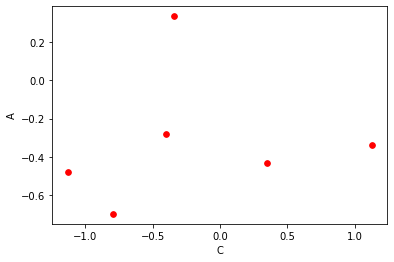

In [14]:
df.plot(kind='scatter',x='C',y='A', color='r', marker='o', s=32)  

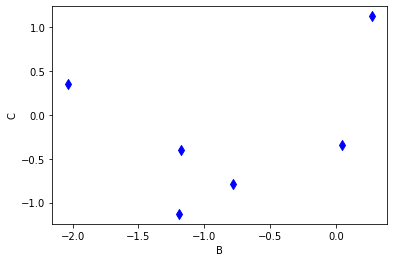

In [15]:
df.plot(kind='scatter',x='B',y='C', color='blue', marker='d', s=50)  

### 바 그래프

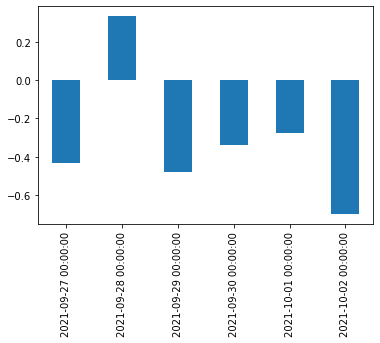

In [16]:
df['A'].plot.bar()

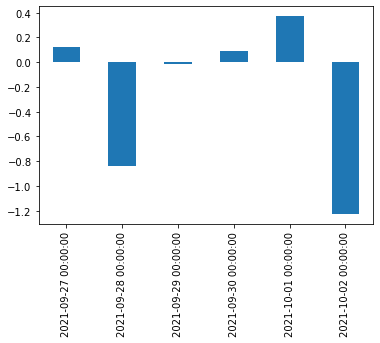

In [17]:
df['D'].plot.bar()

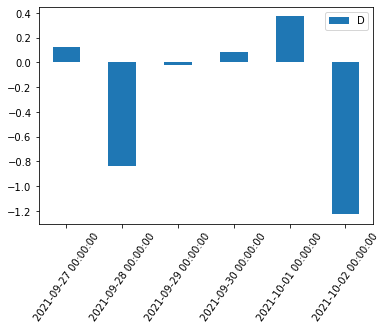

In [18]:
df.plot(kind='bar', y='D', rot=55) #rot x축 레이블 각도 제어.

#### 다중 바그래프

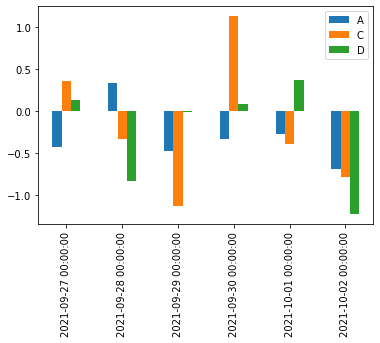

In [19]:
df.plot(kind='bar',y=['A','C','D'])

#### 평균/표준편차 그래프

In [20]:
df.mean(0), df.std(0), df.columns

(A   -0.315431
 B   -0.811650
 C   -0.196224
 D   -0.249565
 dtype: float64, A    0.349220
 B    0.858542
 C    0.817589
 D    0.630736
 dtype: float64, Index(['A', 'B', 'C', 'D'], dtype='object'))

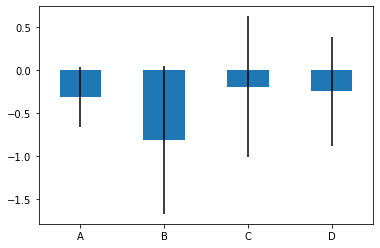

In [21]:
# plot bars
# bar_labels = df.columns
# plt.bar(bar_labels, df.mean(0), yerr=df.std(0))
df.mean(0).plot.bar(yerr=df.std(0), rot=0) 



---



### 그래프 이어 그리기

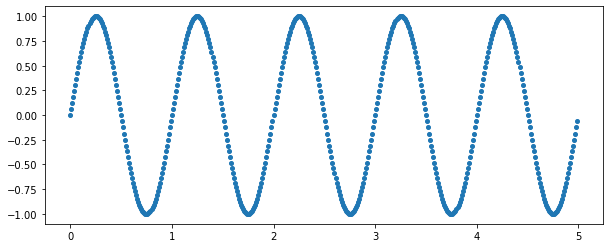

In [22]:
x1 = np.arange(0.0, 5.0, 0.01)
y1 = np.sin(2*np.pi*x1)
plt.figure(figsize=(10,4)) # 가로 10, 세로 4의 영역으로 그림.
plt.plot(x1, y1, 'o', ms = 4)

In [23]:
x1.shape, y1.shape

((500,), (500,))

#### pandas 데이터프레임을 이용한 그래프 

In [24]:
df = pd.DataFrame(dict(sine=y1), index=x1, columns=['sine'])
df.head()

,sine
0.00,0.000000
0.01,0.062791
0.02,0.125333
0.03,0.187381
0.04,0.248690


In [25]:
df.tail()

,sine
4.95,-0.309017
4.96,-0.248690
4.97,-0.187381
4.98,-0.125333
4.99,-0.062791


In [26]:
len(df)

500

In [27]:
pre_size = int(len(df) * 0.8)
post_size = len(df) - pre_size
pre, post = df.iloc[0:pre_size], df.iloc[pre_size:len(df)]
print(len(pre), len(post))

400 100


In [28]:
post.shape

(100, 1)

In [29]:
post2 = post + np.random.normal(scale=0.2, size=len(post)).reshape(-1,1)

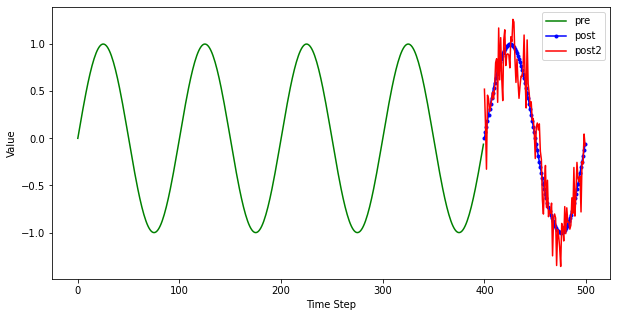

In [30]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(0, len(pre)), pre, 'g', label="pre")
plt.plot(np.arange(len(pre), len(pre) + len(post)), post, 'b', marker='.', label="post")
plt.plot(np.arange(len(pre), len(pre) + len(post)), post2, 'r', label="post2")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

#### post  post2를 동시에 그려서 두 그래프를 비교해보시오. 

- subplot 사용

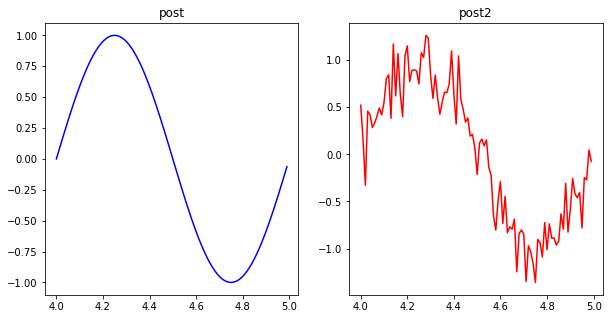

In [33]:
plt.figure(figsize=(10,5))
plt.subplot(121).set_title("post")
plt.plot(post,'b')

plt.subplot(122).set_title("post2")
plt.plot(post2,'r')
plt.show();